In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import bokeh
from bokeh.plotting import figure, output_file, show, ColumnDataSource
# import bokeh.charts.utils
import bokeh.io
import bokeh.models
from bokeh.models import HoverTool
import bokeh.palettes
import bokeh.plotting
import random
from random import sample
from sklearn import svm, neighbors
from sklearn.model_selection import ShuffleSplit
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsRegressor

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Preprocessing, normalization done in excel (Xnew = (X-mean)/std))
# If we want to normalize in Python we can use preprocessing.scale()
Data = pd.read_csv('songs4.csv')
Data = Data.iloc[:, 0:18]
#Data = Data.drop(Data[(Data.time_signature > 5)].index)
Data.head()

,ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,zero_ts,one_ts,three_ts,four_ts,five_ts
0,5CQ30WqJwcep0pYcV4AMNc,-1.268543,-0.885605,1.050276,-0.280775,-1.258128,-0.630077,0.678645,-0.649848,-0.480625,-1.032112,-1.205528,1.347462,-0.040332,-0.105962,-0.314267,0.378598,-0.152588
1,0yE62JSC9J9C4Q4OBMwBgA,-0.385007,-0.303138,1.050276,0.009403,0.794818,2.212337,-0.630163,-0.658555,-0.504163,-0.175880,-0.772431,-0.113739,-0.040332,-0.105962,3.181954,-2.641279,-0.152588
2,66v8ihTuXUDKqienUaFzIe,-1.191040,-0.723399,-0.901086,-0.765659,0.794818,0.067502,-0.499560,-0.658546,-0.357049,-0.255795,1.629569,-0.519527,-0.040332,-0.105962,-0.314267,0.378598,-0.152588
3,6l4HJkk0CwELcf1CgrbAth,1.511236,0.098691,-1.179852,0.430741,0.794818,-0.338460,-0.052175,-0.658555,0.113717,-0.000828,0.370186,-0.701656,-0.040332,-0.105962,-0.314267,0.378598,-0.152588
4,68rPZWbtaNGUh15AVTSlNn,-0.152498,0.330941,-1.179852,0.428633,0.794818,0.561423,-0.893036,-0.658555,-0.527702,-0.274822,0.025924,0.156217,-0.040332,-0.105962,-0.314267,0.378598,-0.152588


In [3]:
# check number of rows
Data.count()

ID                  60342
danceability        60342
energy              60342
key                 60342
loudness            60342
mode                60342
speechiness         60342
acousticness        60342
instrumentalness    60342
liveness            60342
valence             60342
tempo               60342
duration_ms         60342
zero_ts             60342
one_ts              60342
three_ts            60342
four_ts             60342
five_ts             60342
dtype: int64

In [4]:
# Divide into testing and training
x = Data.drop('valence', 1)
y = Data.valence
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)
train = xtrain
train['valence'] = ytrain
train = train [0: 5000]
train.head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,zero_ts,one_ts,three_ts,four_ts,five_ts,valence
43245,5EPHhxn2T7Rz48nnYUA9uu,-0.571015,-0.531701,0.771510,0.132281,0.794818,-0.602336,0.459121,-0.658555,-0.527702,-0.957665,-1.061564,-0.040332,-0.105962,-0.314267,0.378598,-0.152588,-1.302301
52327,6Lpw3Sue6eVRq2PKxhVOJh,0.312521,1.204642,-1.458618,0.459653,0.794818,-0.632106,-0.929771,1.746749,1.673127,0.305964,-0.452797,-0.040332,-0.105962,-0.314267,0.378598,-0.152588,0.444413
18529,7lXBDRKx9IJPl0HdYdxafd,1.072051,1.153031,-1.179852,1.246160,0.794818,-0.385146,0.211809,-0.656655,-0.492394,1.680754,0.277382,-0.040332,-0.105962,-0.314267,0.378598,-0.152588,1.711637
15266,4bF6P3Rze2wgZclKcLjUd9,-0.431509,-0.461657,0.213978,-0.156843,0.794818,0.290782,0.350749,-0.070833,-0.374703,-0.622062,-0.116965,-0.040332,-0.105962,-0.314267,0.378598,-0.152588,-0.594482
29250,6cRGlDYP3JEWooMvXboFUT,-0.581349,-0.848740,-1.458618,-0.637812,0.794818,-0.477164,-0.141096,-0.646365,0.837519,-1.007025,-0.254976,-0.040332,-0.105962,-0.314267,0.378598,-0.152588,-1.401244


In [5]:
# Create correlation matrix
M = train.corr()

In [6]:
M

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,zero_ts,one_ts,three_ts,four_ts,five_ts,valence
danceability,1.000000,0.365916,0.014632,0.445496,-0.062187,0.224215,-0.438198,-0.300135,-0.053378,0.039000,-0.100699,-0.121216,-0.088947,-0.249242,0.293383,-0.078350,0.466122
energy,0.365916,1.000000,0.084007,0.830794,-0.082153,0.139396,-0.752840,-0.335826,0.200216,0.252867,-0.060401,-0.080201,-0.106541,-0.256950,0.298142,-0.072700,0.361941
key,0.014632,0.084007,1.000000,0.066605,-0.201654,0.018020,-0.070125,-0.027083,0.030127,0.022172,-0.001117,-0.018330,-0.012244,-0.016120,0.026164,-0.013611,0.043870
loudness,0.445496,0.830794,0.066605,1.000000,-0.058784,0.127631,-0.690898,-0.496284,0.148986,0.218869,-0.134608,-0.084285,-0.122534,-0.249000,0.289089,-0.055273,0.348676
mode,-0.062187,-0.082153,-0.201654,-0.058784,1.000000,-0.004510,0.096920,-0.018290,0.004167,0.018310,-0.026353,0.021980,0.000075,0.052043,-0.058366,0.024026,0.017323
speechiness,0.224215,0.139396,0.018020,0.127631,-0.004510,1.000000,-0.071542,-0.281760,0.197719,-0.010031,-0.044496,-0.034727,0.002392,-0.013052,-0.034179,0.109000,0.129958
acousticness,-0.438198,-0.752840,-0.070125,-0.690898,0.096920,-0.071542,1.000000,0.318302,-0.087966,-0.203655,0.045015,0.009914,0.114874,0.292414,-0.324201,0.075714,-0.215903
instrumentalness,-0.300135,-0.335826,-0.027083,-0.496284,-0.018290,-0.281760,0.318302,1.000000,-0.145074,-0.028876,0.191024,0.023816,0.049694,0.090143,-0.094461,-0.004711,-0.306596
liveness,-0.053378,0.200216,0.030127,0.148986,0.004167,0.197719,-0.087966,-0.145074,1.000000,0.028471,-0.017215,0.007760,-0.011000,-0.009837,0.011594,-0.001180,0.042771
tempo,0.039000,0.252867,0.022172,0.218869,0.018310,-0.010031,-0.203655,-0.028876,0.028471,1.000000,-0.031503,-0.159751,-0.033161,-0.034650,0.077272,-0.038608,0.116658


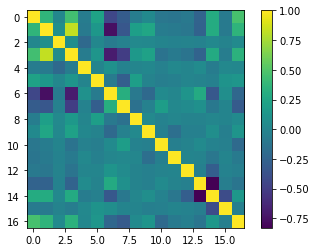

In [7]:
# correlation matrix
plt.imshow(M)
plt.colorbar()
plt.show()

In [8]:
# SVD using numpy function
U, E, VT = np.linalg.svd(M)

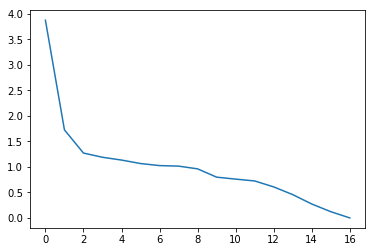

In [9]:
plt.plot(E)
plt.show()

In [10]:
P = np.dot(U[:,:2],np.diag(E[:2]))

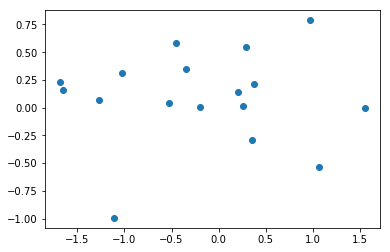

In [11]:
plt.plot(P[:,0], P[:,1],'o')
plt.show()

In [12]:
N = train.T
N.columns = N.iloc[0]
N = N.drop('ID')
N = N.astype(float)

In [13]:
# Takes 10-15 minutes with all of the data
N = N.corr()
N.head()

ID,5EPHhxn2T7Rz48nnYUA9uu,6Lpw3Sue6eVRq2PKxhVOJh,7lXBDRKx9IJPl0HdYdxafd,4bF6P3Rze2wgZclKcLjUd9,6cRGlDYP3JEWooMvXboFUT,05Wjds52t0xdTqqb9FaatS,7wNNQyZMERHB9Uipgeugun,4vszmfdwa2OaKeGHL474wn,4XLroEmQClrfdEpoGiaogy,7kjuqWo3znP8pLpVKccnyG,...,719H9d7qKQDZiWzWeqHGjM,0WgQTMtmw8qJievyeqfnnS,0oJCXJr50TzUeDtzlSb0V1,6L1IPuHKO5MHQW4hJp1E3G,4kroJVWa48jLGq0K5ErOkg,5FYNsXQsEfa2nwmu7OfFqN,2IcWMogY2RQHsnhwwQDQ4I,2ZalsDXz9MkQywgbmBJVPX,2LsRYjtdsotlgmV8lNtv8A,02UQBuukBkysZQfW5D1Twn
ID,,,,,,,,,,,,,,,,,,,,,
5EPHhxn2T7Rz48nnYUA9uu,1.000000,-0.310481,-0.343088,0.768076,0.346803,0.150641,-0.723027,-0.052845,-0.330570,-0.103129,...,0.063905,-0.133036,-0.346777,-0.430830,0.235361,-0.180155,-0.244552,0.198530,0.080247,-0.289780
6Lpw3Sue6eVRq2PKxhVOJh,-0.310481,1.000000,0.272350,-0.294841,0.289314,-0.176577,0.209357,-0.406045,0.420903,0.081490,...,-0.318993,0.148851,0.091828,0.326991,-0.153505,-0.028878,-0.168687,0.284687,0.820716,0.345048
7lXBDRKx9IJPl0HdYdxafd,-0.343088,0.272350,1.000000,-0.384667,-0.217179,0.151626,0.688047,-0.179649,0.222272,-0.014657,...,0.048832,0.245033,0.396081,0.314107,-0.541050,0.447053,0.197361,0.201665,-0.192769,0.188297
4bF6P3Rze2wgZclKcLjUd9,0.768076,-0.294841,-0.384667,1.000000,0.467479,0.215448,-0.672215,0.239948,-0.422330,-0.226798,...,0.080256,-0.519133,-0.340617,-0.558410,0.261233,0.062850,-0.168838,0.355655,0.149338,-0.395805
6cRGlDYP3JEWooMvXboFUT,0.346803,0.289314,-0.217179,0.467479,1.000000,-0.184105,-0.313479,0.166889,-0.487872,0.012546,...,0.161680,-0.219774,-0.095571,-0.579424,-0.061042,0.166170,-0.109179,0.482092,0.435969,0.160794


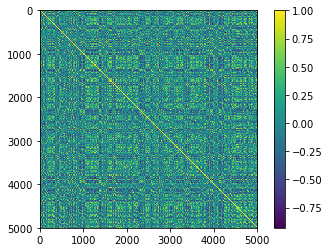

In [14]:
# Identifies how different songs correlate to each other, there is a fair amount of uniqueness among songs
plt.imshow(N)
plt.colorbar()
plt.show()

In [15]:
U, E, VT = np.linalg.svd(N)

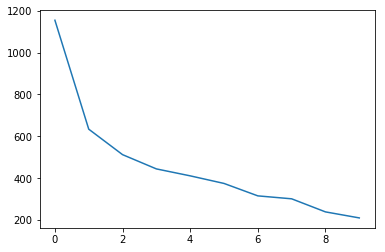

In [16]:
# Most of the variance can be explained using the first 8 or so components
plt.plot(E[:10])
plt.show()

In [17]:
P = np.dot(U[:,:2],np.diag(E[:2]))
print(P)

[[ -7.16944042  -2.6218435 ]
 [  7.79049019  -8.35094407]
 [ 19.64220559 -11.61711746]
 ..., 
 [ 10.10977961 -14.94176282]
 [ -3.53217998  -6.32017377]
 [ 12.371544     3.90929499]]


In [18]:
# plot first two principal components to get an idea of the shape of the data
_tools_to_show = 'box_zoom,pan,save,hover,resize,reset,tap,wheel_zoom'        
p = figure(plot_width=400, plot_height=400, title=None, tools=_tools_to_show)

# add a circle renderer with a size, color, and alpha
p.circle(P[:,0], P[:,1], size=4, color="navy", alpha=0.2)

# show the results
show(p)

In [19]:
# SVM on PCA results

In [20]:
# Further divide training and testing based on principal components
# Slice U and E based on the ideal number of principal components
P = np.dot(U,np.diag(E))
PCA_xtrain, PCA_xtest, PCA_ytrain, PCA_ytest = train_test_split(P, train['valence'], test_size = 0.2, random_state = 0)

In [21]:
SVM_clf = svm.SVR(kernel='rbf')

In [22]:
SVM_clf.fit(PCA_xtrain, PCA_ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
# testing error
SVM_test_ypreds = SVM_clf.predict(PCA_xtest)
MSE = np.mean((SVM_test_ypreds - PCA_ytest)**2)
MSE

0.037563202709593985

In [26]:
SVM_clf.score(PCA_xtest, PCA_ytest)

0.96203311613856668

In [27]:
SVM_clf.score(PCA_xtrain, PCA_ytrain)

0.96473889063581431

In [29]:
# training error
SVM_train_ypreds = SVM_clf.predict(PCA_xtrain)
SVM_test_MSE = np.mean((SVM_train_ypreds - PCA_ytrain)**2)
SVM_test_MSE

0.03409318708353703

In [30]:
# cross validate for values of C and gamma, start by defining the ranges for each
C_range = 10. ** np.arange(-3, 6)
gamma_range = 10. ** np.arange(-5, 1)

In [31]:
# Cross validate for optimal value of C
C_MSE = []
for i in C_range: 
    SVM_clf_C = svm.SVR(kernel='rbf', C = i)
    SVM_clf_C.fit(PCA_xtrain, PCA_ytrain)
    SVM_test_ypreds_C = SVM_clf_C.predict(X_test)
    SVM_test_MSE_C = np.mean((SVM_test_ypreds_C - y_test)**2)
    C_MSE.append(SVM_test_MSE_C)

NameError: name 'X_test' is not defined

In [ ]:
# Plot values of C vs MSE
_tools_to_show = 'box_zoom,pan,save,hover,resize,reset,tap,wheel_zoom'        
p_C_MSE = figure(plot_width=400, plot_height=400, title=None, tools=_tools_to_show)

# add a circle renderer with a size, color, and alpha
p_C_MSE.circle (C_range, C_MSE, size=10, color="green", alpha=0.5)

# show the results
show(p_C_MSE)

In [ ]:
# Using our optimal value of C, we cross validate to find the optimal value of gamma
gamma_MSE = []
for i in gamma_range: 
    SVM_clf_gamma = svm.SVR(kernel='rbf', C = 100, gamma = i)
    SVM_clf_gamma.fit(PCA_xtrain, PCA_ytrain)
    SVM_test_ypreds_gamma = SVM_clf_gamma.predict(PCA_xtest)
    SVM_test_MSE_gamma = np.mean((y_preds - y_test)**2)
    gamma_MSE.append(SVM_test_MSE_gamma)

In [ ]:
# Plot various values of gamma vs MSE
_tools_to_show = 'box_zoom,pan,save,hover,resize,reset,tap,wheel_zoom'        
p_gamma_MSE = figure(plot_width=400, plot_height=400, title=None, tools=_tools_to_show)

# add a circle renderer with a size, color, and alpha
p_gamma_MSE.circle (gamma_range, gamma_MSE, size=10, color="orange", alpha=0.5)

# show the results
show(p_gamma_MSE)

In [ ]:
# Random Forest

RF_clf = RandomForestRegressor()

# specify parameters and distributions to sample from
parameters_rand = {
    "n_estimators": sp_randint(10, 60),
    "bootstrap": [True, False],
}

# run randomized search
# Accuracy should be comparable to grid search, but runs much much faster
n_iter_search = 20
random_search = RandomizedSearchCV(RF_clf, param_distributions=parameters_rand,
                                   n_iter=n_iter_search,
                                   n_jobs=-1)

random_search.fit(PCA_xtrain, PCA_ytrain)

predicted = random_search.predict(PCA_xtest)

print("PCA with random forest")
random_search.score(PCA_xtest, PCA_ytest)

In [ ]:
# Lasso (on it's own)
from sklearn import linear_model

# Train
lasso_models = {} # Keyed by alpha
xtrain_no_id = xtrain.iloc[:, 1:]
xtest_no_id  = xtest.iloc[:, 1:]

for alpha in [0.01, 0.05, 0.1, 0.2, 0.5, 0.7, 1.0]:
    lasso_model = linear_model.Lasso(alpha=alpha)
    lasso_model.fit(xtrain_no_id, ytrain)
    
    # Training error
    lasso_train_ypreds = lasso_model.predict(xtrain_no_id)
    lasso_train_MSE = np.mean((lasso_train_ypreds - ytrain) ** 2)
    
    # Testing error
    lasso_test_ypreds = lasso_model.predict(xtest_no_id)
    lasso_test_MSE = np.mean((lasso_test_ypreds - ytest)**2)
    
    # Output
    print("alpha: {}".format(alpha))
    print("training error: {}".format(lasso_train_MSE))
    print("testing  error: {}".format(lasso_test_MSE))
    
    # Save
    lasso_models[alpha] = lasso_model

In [ ]:
# KNN

In [ ]:
jig = neighbors.KNeighborsRegressor()

In [ ]:
jig.fit(PCA_xtrain, PCA_ytrain)

In [ ]:
knn_test_ypreds = jig.predict(PCA_xtest)

In [ ]:
knn_test_MSE = np.mean((y_pred2 - y_test)**2)

In [ ]:
knn_test_MSE

In [ ]:
jig.score(PCA_xtest, PCA_ytest)

In [ ]:
n_samples = PCA_xtrain.data.shape[0]

In [ ]:
n_samples

In [ ]:
# cross validation for KNN  
kf = KFold(n_samples, n_folds=5, shuffle=False)
print(kf)

In [ ]:
# we use cross validation to find the optimal number of k
k  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
knn_test_MSE_k = []
for i in k: 
    knn = KNeighborsRegressor(n_neighbors=i)
    scores = cross_val_score(knn, PCA_xtrain, PCA_ytrain, cv=5, scoring='neg_mean_squared_error')
    MSE_k = abs(sum(scores))/5
    knn_test_MSE_k.append(MSE_k)

In [ ]:
# graph number of k vs mse
_tools_to_show = 'box_zoom,pan,save,hover,resize,reset,tap,wheel_zoom'        
p_knn_MSE = figure(plot_width=400, plot_height=400, title=None, tools=_tools_to_show)

# add a circle renderer with a size, color, and alpha
p_knn_MSE.circle (k, knn_test_MSE, size=10, color="red", alpha=0.5)

# show the results
show(p_knn_MSE)